# Week 1 - The What Why and when of Machine Learning
Main idea is to follow that notebook in order to have an initial aproach -  this doesn't means that you only have to answer to the questions or implement code. Feel free to add all the interesting content that you find and take conclusions from the data. Please just use this as a template

# 0. Library import and list input files

In [2]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys


#Ignore Warnings - save some confusion
import warnings
warnings.filterwarnings('ignore')

#Pandas more columns
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

# Add input as import path
sys.path.insert(0,'../input')

# Plot style
plt.style.use('fivethirtyeight')

# Import the data from the dataset
train_data = pd.read_csv('../input/train.csv',index_col='id')
test_data = pd.read_csv('../input/test.csv',index_col='id')

trd = train_data # too much to write each time



# 1. Feature engineering

### 1.1 Data engineering.
Objectives:
* Create three new features using the actual features.
* Create plots like in the first session. (Categorical / Numerical)


In [25]:

# Todo 1 : Create a new feature that describes if people travels alone or not.
#dataset['TravelAlone'] = ...

# Todo 2 : Create a new feature that represents the FamilySize - for each passenger a new column with a number 1..n
#dataset['FamilySize'] = ...

# Todo 3 : Create a new feature based in the Title name for example Sr, Mrs, Rev.
# Clue 1: As we can see different classes of title name exist. Decide how to group and decide 
#train_data['name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0].unique()
# Your work
#dataset['RareName'] = ....

# Optional : Plot the data in plots like in the previous training notebook (Categorical / Numerical)


#Objective 1 - create 3 new features
#Feature #1  TravelAlone
trd["TravelAlone"] = trd["sibsp"] == 0
#display(trd[["sibsp", "TravelAlone"]]) #To Check if all is well

#Feature #2 - nr_cabins
# Oh man - can I make this a lambda??
def count_words(sample):
    return len(str(sample).split())
trd["nr_cabins"] = trd["cabin"].apply(count_words)


#Feature #3 - Fare per cabin
trd["fare_per_cabin"] = trd["fare"].astype(float)/trd["nr_cabins"].astype(float)
#display(trd[["fare", "fare_per_cabin", "nr_cabins"]]) #All is well - just double checking

### 1.2 Data correlation.
Objectives:
* Create a heatmap that show the data correlation
* Understand the data correlation

Questions:
* Q1: Which are the top three pairs of data with more correlation? (ToDo 1..2 and 3..4 ) 
* Q2: Is the sex of the passengers related with survival?
* Q3: If two features have a lot of correlation we want to preserve both or only use one?
* Q4: Are the previous new created features related with the survivance in the accident? Choose the one that you think that is the best.


Before Answering. Some basics -> Data Correlation for the features pclass/age


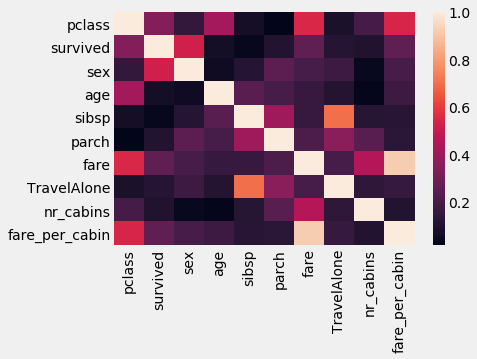

A1 : Most Correlated pairs
fare <--> fare_per_cabin
TravelAlone <--> sibsp
sibsp <--> TravelAlone
pclass <--> fare
fare_per_cabin <--> fare




A2: SEX-Survived correlation ratio. =  0.524846293771
It is correlated
Not Heavily correlated




A3. We want to preserve both.
However, we also want to see how each of the features correlates with every other
In the case as answered in A2, we want to keep 'fare' for sure as it appears in 3 top correlations




A4. Using the heatmap of the new features to evaluate this


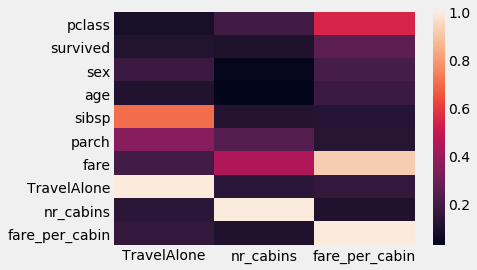

TravelAlone       0.115157
nr_cabins         0.104661
fare_per_cabin    0.260290
Name: survived, dtype: float64
Looking at the heatmap, I think fare_per_cabin has the most correlation with survived
But! some already existing(not newly created) like age-survived features are better off


In [103]:

# PreTodo. Copying train_data into another variable. Some examples
sample_data = trd.copy()
sample_data.drop(columns=["body"], inplace=True) #Dropping target variable
sex_types = {"male":1, "female":0}
sample_data["sex"] = sample_data["sex"].apply(sex_types.get) # Converting into numerical label
#Work with your train data , the same way we work with sample_data



# Answer 1: Compute the correlation for all the features ( Remember that the survived column is our label )
print("Before Answering. Some basics -> Data Correlation for the features pclass/age")
data_correlation = np.abs(sample_data.corr()) #Absolute data correlation - Only magnitudes are important
# Plot the data in a fancy plot like the sns.heatmap
sns.heatmap(data_correlation) 
plt.show()
# I can look at the data_correlation map to find the max-correlated pairs or ..
data_corr_arr = np.array(data_correlation)
#forcing identity elements to -1. We want unique pairs, not age-age, survived-survived , etc
for i in range(len(data_corr_arr)):
    data_corr_arr[i,i] = -1

num_largest = 5
indices = (-data_corr_arr).argpartition(num_largest, axis=None)[:num_largest]
x, y = np.unravel_index(indices, data_corr_arr.shape)
print("A1 : Most Correlated pairs")
for ix,iy in zip(x,y):
    print(data_correlation.columns[ix],"<-->",data_correlation.columns[iy])

# ToDo 3: Compute the correlation between the sex feature and survived label 
print("\n\n\n")
sex_survived_corr_ratio = data_correlation["sex"]["survived"]
print("A2: SEX-Survived correlation ratio. = ", sex_survived_corr_ratio)
if sex_survived_corr_ratio > 0.5:
    print("It is correlated")
if sex_survived_corr_ratio <0.8:
    print("Not Heavily correlated")

print("\n\n\n")    
print("A3. We want to preserve both.")
print("However, we also want to see how each of the features correlates with every other")
print("In the case as answered in A2, we want to keep 'fare' for sure as it appears in 3 top correlations")

print("\n\n\n")    
print("A4. Using the heatmap of the new features to evaluate this")
new_data_corr =  data_correlation[["TravelAlone","nr_cabins","fare_per_cabin"]]
#print(new_data_corr.iloc(data_correlation.columns.index("survived")))
sns.heatmap(new_data_corr)
idx_survived = list(data_correlation.columns).index("survived")
plt.show()
print(np.abs(new_data_corr.iloc[idx_survived]))
print("Looking at the heatmap, I think fare_per_cabin has the most correlation with survived")
print("But! some already existing(not newly created) like age-survived features are better off")

# 2. Data visualization.
Objectives:
* Use PCA to reduce the dimensions of our data
* Analyze the separability of our data

Questions:
* Q1: Is the data separable?
* Q2: You think that we need to reduce the dimensionality of our data?
* Q3: Find whitch infromation returns the explained_variance_ratio_ method


In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearnPCA
# 
"""
First of all we need to scale our data we have different features measured in different "units" what we need is to normali
this features to be in the same range, the easiest way to do this is with the MinMaxScaler
"""

# NOT ANSWERING THESE AS  MORE SUBJECTIVE THAN OBJECTIVE. WILL DISCUSS IN CLASS

# 1. Select a subset of data
#train_data_subset = train_data[["age", "sex", "pclass", "embarked", "TravelAlone"]]
train_data_subset = train_data[["age", "pclass", "sibsp", "embarked", "sex"]]

# Todo 1: Convert the categorical labels to numerical for example Sex can be converted to a boolean
train_data_subset["sex"] = ...
train_data_subset["embarked"] = ....

# 2. Remove NA with 0 probably exist a better way :)
train_data_subset.fillna(0, inplace=True)

# 3. Scale the data
scaler = MinMaxScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data_subset), columns=train_data_subset.columns)

#After
print("Before scale:")
print(train_data_subset[0:3])
print("\n")
#Before
print("After scale:")
print(train_data_scaled[0:3])
print("\n")

# 4. Compute PCA
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(train_data_scaled))
train_data.index = range(len(train_data.index))

# 5. Plot the data with the reduced dimentions
plt.scatter(transformed[train_data["survived"]==0][0], transformed[train_data["survived"]==0][1], label='Died', c='red')
plt.scatter(transformed[train_data["survived"]==1][1], transformed[train_data["survived"]==1][1], label='Survived', c='blue')
plt.legend()
plt.show()

# 6. Interesting methods
print(pca.explained_variance_ratio_ )


SyntaxError: invalid syntax (<ipython-input-105-1bf45be22fb6>, line 17)